In [ ]:
# Установка FastQC

!wget https://www.bioinformatics.babraham.ac.uk/projects/fastqc/fastqc_v0.11.9.zip
!unzip fastqc_v0.11.9.zip
!chmod a+x FastQC/fastqc

--2022-02-17 16:04:09--  https://www.bioinformatics.babraham.ac.uk/projects/fastqc/fastqc_v0.11.9.zip
Resolving www.bioinformatics.babraham.ac.uk (www.bioinformatics.babraham.ac.uk)... 149.155.133.4
Connecting to www.bioinformatics.babraham.ac.uk (www.bioinformatics.babraham.ac.uk)|149.155.133.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10249221 (9.8M) [application/zip]
Saving to: ‘fastqc_v0.11.9.zip’

fastqc_v0.11.9.zip  100%[===================>]   9.77M  6.59MB/s    in 1.5s    

2022-02-17 16:04:10 (6.59 MB/s) - ‘fastqc_v0.11.9.zip’ saved [10249221/10249221]

Archive:  fastqc_v0.11.9.zip
  inflating: FastQC/cisd-jhdf5.jar   
   creating: FastQC/Configuration/
  inflating: FastQC/Configuration/adapter_list.txt  
  inflating: FastQC/Configuration/contaminant_list.txt  
  inflating: FastQC/Configuration/limits.txt  
  inflating: FastQC/fastqc           
  inflating: FastQC/fastqc_icon.ico  
   creating: FastQC/Help/
   creating: FastQC/Help/1 Introductio

Скачивание данных секвенировия с ENA

In [ ]:
# 8 cell
! wget ftp://ftp.sra.ebi.ac.uk/vol1/fastq/SRR583/003/SRR5836473/SRR5836473_1.fastq.gz

--2022-02-17 17:39:11--  ftp://ftp.sra.ebi.ac.uk/vol1/fastq/SRR583/003/SRR5836473/SRR5836473_1.fastq.gz
           => ‘SRR5836473_1.fastq.gz.1’
Resolving ftp.sra.ebi.ac.uk (ftp.sra.ebi.ac.uk)... 193.62.197.74
Connecting to ftp.sra.ebi.ac.uk (ftp.sra.ebi.ac.uk)|193.62.197.74|:21... connected.
Logging in as anonymous ... Logged in!
==> SYST ... done.    ==> PWD ... done.
==> TYPE I ... done.  ==> CWD (1) /vol1/fastq/SRR583/003/SRR5836473 ... done.
==> SIZE SRR5836473_1.fastq.gz ... 6856386252
==> PASV ... done.    ==> RETR SRR5836473_1.fastq.gz ... done.
Length: 6856386252 (6.4G) (unauthoritative)

SRR5836473_1.fastq. 100%[===================>]   6.38G  10.9MB/s    in 12m 19s 

2022-02-17 17:51:30 (8.85 MB/s) - Control connection closed.
Retrying.

--2022-02-17 18:06:31--  ftp://ftp.sra.ebi.ac.uk/vol1/fastq/SRR583/003/SRR5836473/SRR5836473_1.fastq.gz
  (try: 2) => ‘SRR5836473_1.fastq.gz.1’
Connecting to ftp.sra.ebi.ac.uk (ftp.sra.ebi.ac.uk)|193.62.197.74|:21... connected.
Logging in as a

Установка Bismark с зависимостями (+bowtie2, samtools)

In [ ]:
! pip install -q condacolab
import condacolab
condacolab.install()

✨🍰✨ Everything looks OK!


In [ ]:
import condacolab
condacolab.check()

✨🍰✨ Everything looks OK!


In [ ]:
! conda install -c bioconda bismark

Solving environment: / - \ | / - \ | / - done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - bismark


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    bismark-0.23.1             |       hdfd78af_0         6.6 MB  bioconda
    bowtie2-2.2.5              |   py37h22450f8_8        14.9 MB  bioconda
    ca-certificates-2021.10.8  |       ha878542_0         139 KB  conda-forge
    certifi-2021.10.8          |   py37h89c1867_1         145 KB  conda-forge
    conda-4.11.0               |   py37h89c1867_0        16.9 MB  conda-forge
    hisat2-2.2.1               |       h1b792b2_3        16.5 MB  bioconda
    perl-5.32.1                | 0_h7f98852_perl5        14.5 MB  conda-forge
    python_abi-3.7             |          2_cp37m           4 KB  conda-forge
    samtools-1.3.1             |                0         1.5 MB  bioconda
  

Загружаем bam-файлы из собственного google диска, куда они были перезалиты



In [ ]:
!gdown --id 1ZB006wl8sfMFHnAm_LLiHL22L9vE6WWP
!gdown --id 1PUMkNCtqnpc0vMVit8spfwJfncY8a0sP
!gdown --id 1K1QEbBlLcsONVntjLrLl9LAbEIbYDr20

Downloading...
From: https://drive.google.com/uc?id=1ZB006wl8sfMFHnAm_LLiHL22L9vE6WWP
To: /content/SRR5836473_1_bismark_bt2_pe.bam
100% 667M/667M [00:03<00:00, 176MB/s]
Downloading...
From: https://drive.google.com/uc?id=1PUMkNCtqnpc0vMVit8spfwJfncY8a0sP
To: /content/SRR5836475_1_bismark_bt2_pe.bam
100% 960M/960M [00:05<00:00, 164MB/s]
Downloading...
From: https://drive.google.com/uc?id=1K1QEbBlLcsONVntjLrLl9LAbEIbYDr20
To: /content/SRR3824222_1_bismark_bt2_pe.bam
100% 1.56G/1.56G [00:08<00:00, 176MB/s]


Загружаем отчеты о выравнивании

In [ ]:
! gdown --id 1a-USP32jw0n6L9pRqsbUCjt4j8VopPBg
! gdown --id 14vyhf4aKfEPXR2yfK1Rk_f3Muzf1hL40
! gdown --id 1tnhtwKBO2Fszj-Im30XuuADtO7oIN5-B

Downloading...
From: https://drive.google.com/uc?id=1a-USP32jw0n6L9pRqsbUCjt4j8VopPBg
To: /content/SRR3824222_1_bismark_bt2_PE_report.txt
100% 1.90k/1.90k [00:00<00:00, 3.36MB/s]
Downloading...
From: https://drive.google.com/uc?id=14vyhf4aKfEPXR2yfK1Rk_f3Muzf1hL40
To: /content/SRR5836475_1_bismark_bt2_PE_report.txt
100% 1.89k/1.89k [00:00<00:00, 2.65MB/s]
Downloading...
From: https://drive.google.com/uc?id=1tnhtwKBO2Fszj-Im30XuuADtO7oIN5-B
To: /content/SRR5836473_1_bismark_bt2_PE_report.txt
100% 1.90k/1.90k [00:00<00:00, 2.29MB/s]


In [ ]:
! ls -lh

total 9.4G
-rw-r--r-- 1 root root  15K Feb 17 18:18 condacolab_install.log
drwxr-xr-x 8 root root 4.0K Feb 17 16:04 FastQC
-rw-r--r-- 1 root root 9.8M Jan 15  2020 fastqc_v0.11.9.zip
drwxr-xr-x 1 root root 4.0K Feb  1 14:32 sample_data
-rw------- 1 root root 1.5G Feb 17 18:33 SRR3824222_1_bismark_bt2_pe.bam
-rw------- 1 root root 1.9K Feb 17 18:30 SRR3824222_1_bismark_bt2_PE_report.txt
-rw------- 1 root root 636M Feb 17 18:32 SRR5836473_1_bismark_bt2_pe.bam
-rw------- 1 root root 1.9K Feb 17 18:30 SRR5836473_1_bismark_bt2_PE_report.txt
-rw-r--r-- 1 root root 6.4G Feb 17 17:51 SRR5836473_1.fastq.gz.1
-rw------- 1 root root 916M Feb 17 18:32 SRR5836475_1_bismark_bt2_pe.bam
-rw------- 1 root root 1.9K Feb 17 18:30 SRR5836475_1_bismark_bt2_PE_report.txt


In [ ]:
! samtools view SRR5836473_1_bismark_bt2_pe.bam | head
! samtools view SRR3824222_1_bismark_bt2_pe.bam | head
! samtools view SRR5836475_1_bismark_bt2_pe.bam | head

SRR5836473.18_18/1	99	chr11	116830009	0	139M	=	116830059	190	TTTATTTTGTTATTGGATTTAGAGATTATTTGGCGGGAATCGGGTTTTTTTTTTTTTTTTTTATAATAGAGTGTCGTAATAGTAAAATTGAGTTTTGATTAGAGTGATTTTGATTTGGTTTCGTTTTTTTTTTCGTTCG	FKKKKKKKKKKKKKKKK<FKKKKFKKKKKKKKKKKKKFKKKKKKFAFKKKKKKKKKKKKKKKAKFFFFKFF7FFFKFKK7AKKKKKKKKAFKKKKAFKKAFKFK,F<FAKKKAFAFFF,FKKKKKKKKKKKKFF<A77F	NM:i:37	MD:Z:0C1C2C0C2C2C6C0C23C0C0C0C0C1C0C0C0C0C2C0C2C4C0T8G2C12C4T1C7C0C4C4C1C4C3C2C3C2	XM:Z:h.h..hx..h..x......x.............Z......Z...hhhhh.hhhhh..hh..h....x.......Z....x............h......x.......hh....h....h.xZ...h...h..xZ..xZ.	XR:Z:CT	XG:Z:CT
SRR5836473.18_18/1	147	chr11	116830059	0	140M	=	116830009	-190	TTTTTTTTTTTTATAATAGAGTGTCGTAATAGTAAAATTGAGTTTTGATTAGAGTGATTTTGATTTGGTTTCGTTTTTTTTTTCGTTCGTTTAGTTTTTTTTTTGTAGTTCGAGTTGTTATTTTAGTTGAATTGTTTATT	KKF<A,KAFA7A7,K77KF<F<A<F<7,,7,7A7,,7AFFFA<,KKKAA<<,7KAF7KKFAA<AKFKKF7<KKKKFKKKKKFFKKFFFKKKKKKKKKFKKKKKKKKFKKFKKKKKKKKKKKKKKKKKKKKKKKKKKKKKF	NM:i:39	MD:Z:0C0C0C0C0C2C0C2C4C0T8G2C12C4T1C7C0C4C4C1C4C3C2C3C

In [ ]:
! samtools sort SRR5836473_1_bismark_bt2_pe.bam -o sorted_8cell.bam
! samtools sort SRR3824222_1_bismark_bt2_pe.bam -o sorted_epiblast.bam
! samtools sort SRR5836475_1_bismark_bt2_pe.bam -o sorted_icm.bam

[bam_sort_core] merging from 5 files...
[bam_sort_core] merging from 11 files...
[bam_sort_core] merging from 7 files...


In [ ]:
! samtools index  sorted_8cell.bam
! samtools index  sorted_epiblast.bam
! samtools index  sorted_icm.bam

In [ ]:
# Количество ридов, закартированных на регион 58717111-58917111 в образце 8-cell:

! samtools view sorted_8cell.bam chr11:58717111-58917111 | cut -f1 | sort -u | wc -l

2744


Количество ридов на других участках во всех образцах

In [ ]:
# 8cell
! samtools view sorted_8cell.bam chr11:11347700-11367700 | cut -f1 | sort -u | wc -l # участок 11347700-11367700
! samtools view sorted_8cell.bam chr11:40185800-40195800 | cut -f1 | sort -u | wc -l # участок 40185800-40195800

1090
464


In [ ]:
# Epiblast
! samtools view sorted_epiblast.bam chr11:11347700-11367700 | cut -f1 | sort -u | wc -l # 11347700-11367700
! samtools view sorted_epiblast.bam chr11:40185800-40195800 | cut -f1 | sort -u | wc -l # 40185800-40195800

2328
1062


In [ ]:
# ICM
! samtools view sorted_icm.bam chr11:11347700-11367700 | cut -f1 | sort -u | wc -l # 11347700-11367700
! samtools view sorted_icm.bam chr11:40185800-40195800 | cut -f1 | sort -u | wc -l # 40185800-40195800

1456
630


Таблица для внесения всех полученных данных о картировании

In [2]:
import pandas as pd

cart = pd.DataFrame({
        'Образец': ['8 Cell', 'epiblast', 'ICM'],
        '11347700-11367700': [1090, 2328, 1456],
        '40185800-40195800': [464, 1062, 630]
     })
cart

,Образец,11347700-11367700,40185800-40195800
0,8 Cell,1090,464
1,epiblast,2328,1062
2,ICM,1456,630


Дедупликация

In [ ]:
! deduplicate_bismark  --bam  --paired  -o s_8_cell  SRR5836473_1_bismark_bt2_pe.bam

Output filename was given as: s_8_cell
Processing paired-end Bismark output file(s) (SAM format):
SRR5836473_1_bismark_bt2_pe.bam


If there are several alignments to a single position in the genome the first alignment will be chosen. Since the input files are not in any way sorted this is a near-enough random selection of reads.

Checking file >>SRR5836473_1_bismark_bt2_pe.bam<< for signs of file truncation...



Now testing Bismark result file SRR5836473_1_bismark_bt2_pe.bam for positional sorting (which would be bad...)	...passed!
Output file is: s_8_cell.deduplicated.bam

skipping header line:	@HD	VN:1.0	SO:unsorted
skipping header line:	@SQ	SN:chr11	LN:122082543
skipping header line:	@PG	ID:Bismark	VN:v0.23.1dev	CL:"bismark -p 2 --gzip mouse_chr -1 data/SRR5836473_1.fastq.gz -2 data/SRR5836473_2.fastq.gz -o cell8/"

Total number of alignments analysed in SRR5836473_1_bismark_bt2_pe.bam:	2850231
Total number duplicated alignments removed:	521904 (18.31%)
Duplicated alignments were 

In [ ]:
! deduplicate_bismark  --bam  --paired  -o s_epiblast  SRR3824222_1_bismark_bt2_pe.bam

Output filename was given as: s_epiblast
Processing paired-end Bismark output file(s) (SAM format):
SRR3824222_1_bismark_bt2_pe.bam


If there are several alignments to a single position in the genome the first alignment will be chosen. Since the input files are not in any way sorted this is a near-enough random selection of reads.

Checking file >>SRR3824222_1_bismark_bt2_pe.bam<< for signs of file truncation...



Now testing Bismark result file SRR3824222_1_bismark_bt2_pe.bam for positional sorting (which would be bad...)	...passed!
Output file is: s_epiblast.deduplicated.bam

skipping header line:	@HD	VN:1.0	SO:unsorted
skipping header line:	@SQ	SN:chr11	LN:122082543
skipping header line:	@PG	ID:Bismark	VN:v0.23.1dev	CL:"bismark -p 2 --gzip mouse_chr -1 data/SRR3824222_1.fastq.gz -2 data/SRR3824222_2.fastq.gz -o epiblast/"

Total number of alignments analysed in SRR3824222_1_bismark_bt2_pe.bam:	7039016
Total number duplicated alignments removed:	205258 (2.92%)
Duplicated alignments

In [ ]:
! deduplicate_bismark  --bam  --paired  -o s_icm  SRR5836475_1_bismark_bt2_pe.bam

Output filename was given as: s_icm
Processing paired-end Bismark output file(s) (SAM format):
SRR5836475_1_bismark_bt2_pe.bam


If there are several alignments to a single position in the genome the first alignment will be chosen. Since the input files are not in any way sorted this is a near-enough random selection of reads.

Checking file >>SRR5836475_1_bismark_bt2_pe.bam<< for signs of file truncation...



Now testing Bismark result file SRR5836475_1_bismark_bt2_pe.bam for positional sorting (which would be bad...)	...passed!
Output file is: s_icm.deduplicated.bam

skipping header line:	@HD	VN:1.0	SO:unsorted
skipping header line:	@SQ	SN:chr11	LN:122082543
skipping header line:	@PG	ID:Bismark	VN:v0.23.1dev	CL:"bismark --gzip mouse_chr -1 data/SRR5836475_1.fastq.gz -2 data/SRR5836475_2.fastq.gz -o ICM/"

Total number of alignments analysed in SRR5836475_1_bismark_bt2_pe.bam:	4159998
Total number duplicated alignments removed:	377882 (9.08%)
Duplicated alignments were found at:	2298

**Бонусная задача**

Bash-скрипт для одновременной дедупликации всех образцов:

In [ ]:
! ls *pe.bam | xargs -P 4 -tI{} deduplicate_bismark  --bam  --paired  -o s_{} {}

Сводная информация о дупликатах

In [3]:
import pandas as pd

doubles = pd.DataFrame({
        'Образцы': ['8 Cell', 'epiblast', 'ICM'],
        'Число дупликаций' : [521904, 205258, 377882],
        'Процент дупликаций' : [81.69, 97.08, 90.92]
     })
doubles

,Образцы,Число дупликаций,Процент дупликаций
0,8 Cell,521904,81.69
1,epiblast,205258,97.08
2,ICM,377882,90.92


In [ ]:
! ls

condacolab_install.log
FastQC
fastqc_v0.11.9.zip
s_8_cell.deduplicated.bam
sample_data
s_epiblast.deduplicated.bam
s_icm.deduplicated.bam
sorted_8cell.bam
sorted_8cell.bam.bai
sorted_epiblast.bam
sorted_epiblast.bam.bai
sorted_icm.bam
sorted_icm.bam.bai
SRR3824222_1_bismark_bt2_pe.bam
SRR3824222_1_bismark_bt2_pe.deduplication_report.txt
SRR3824222_1_bismark_bt2_PE_report.txt
SRR5836473_1_bismark_bt2_pe.bam
SRR5836473_1_bismark_bt2_pe.deduplication_report.txt
SRR5836473_1_bismark_bt2_PE_report.txt
SRR5836473_1.fastq.gz.1
SRR5836475_1_bismark_bt2_pe.bam
SRR5836475_1_bismark_bt2_pe.deduplication_report.txt
SRR5836475_1_bismark_bt2_PE_report.txt


Загружаем хромосому мыши

In [ ]:
! gdown --id 1zT3lvMECICwRgK-Z0q8UfKgMhzOIdrOk

Downloading...
From: https://drive.google.com/uc?id=1zT3lvMECICwRgK-Z0q8UfKgMhzOIdrOk
To: /content/mouse_chr.zip
100% 366M/366M [00:02<00:00, 159MB/s]


In [ ]:
! unzip mouse_chr.zip

Archive:  mouse_chr.zip
   creating: mouse_chr/
   creating: mouse_chr/Bisulfite_Genome/
   creating: mouse_chr/Bisulfite_Genome/CT_conversion/
  inflating: mouse_chr/Bisulfite_Genome/CT_conversion/genome_mfa.CT_conversion.fa  
  inflating: mouse_chr/Bisulfite_Genome/CT_conversion/BS_CT.4.bt2  
  inflating: mouse_chr/Bisulfite_Genome/CT_conversion/BS_CT.1.bt2  
  inflating: mouse_chr/Bisulfite_Genome/CT_conversion/BS_CT.3.bt2  
  inflating: mouse_chr/Bisulfite_Genome/CT_conversion/BS_CT.2.bt2  
  inflating: mouse_chr/Bisulfite_Genome/CT_conversion/BS_CT.rev.2.bt2  
  inflating: mouse_chr/Bisulfite_Genome/CT_conversion/BS_CT.rev.1.bt2  
   creating: mouse_chr/Bisulfite_Genome/GA_conversion/
  inflating: mouse_chr/Bisulfite_Genome/GA_conversion/BS_GA.rev.1.bt2  
  inflating: mouse_chr/Bisulfite_Genome/GA_conversion/BS_GA.rev.2.bt2  
  inflating: mouse_chr/Bisulfite_Genome/GA_conversion/genome_mfa.GA_conversion.fa  
  inflating: mouse_chr/Bisulfite_Genome/GA_conversion/BS_GA.4.bt2  
  inf

Коллинг метилирования

In [ ]:
! bismark_methylation_extractor --gzip --bedGraph --cytosine_report --genome_folder ./mouse_chr s_8_cell.deduplicated.bam


 *** Bismark methylation extractor version v0.23.1 ***

Trying to determine the type of mapping from the SAM header line of file s_8_cell.deduplicated.bam
Treating file(s) as paired-end data (as extracted from @PG line)

Setting option '--no_overlap' since this is (normally) the right thing to do for paired-end data


Setting core usage to single-threaded (default). Consider using --multicore <int> to speed up the extraction process.

Summarising Bismark methylation extractor parameters:
Bismark paired-end SAM format specified (default)
Number of cores to be used: 1
Output will be written to the current directory ('/content')


Summarising bedGraph parameters:
Generating additional output in bedGraph and coverage format
bedGraph format:	<Chromosome> <Start Position> <End Position> <Methylation Percentage>
coverage format:	<Chromosome> <Start Position> <End Position> <Methylation Percentage> <count methylated> <count non-methylated>

Using a cutoff of 1 read(s) to report cytosine posit

In [ ]:
! bismark_methylation_extractor --gzip --bedGraph --cytosine_report --genome_folder ./mouse_chr s_epiblast.deduplicated.bam


 *** Bismark methylation extractor version v0.23.1 ***

Trying to determine the type of mapping from the SAM header line of file s_epiblast.deduplicated.bam
Treating file(s) as paired-end data (as extracted from @PG line)

Setting option '--no_overlap' since this is (normally) the right thing to do for paired-end data


Setting core usage to single-threaded (default). Consider using --multicore <int> to speed up the extraction process.

Summarising Bismark methylation extractor parameters:
Bismark paired-end SAM format specified (default)
Number of cores to be used: 1
Output will be written to the current directory ('/content')


Summarising bedGraph parameters:
Generating additional output in bedGraph and coverage format
bedGraph format:	<Chromosome> <Start Position> <End Position> <Methylation Percentage>
coverage format:	<Chromosome> <Start Position> <End Position> <Methylation Percentage> <count methylated> <count non-methylated>

Using a cutoff of 1 read(s) to report cytosine pos

In [ ]:
! bismark_methylation_extractor --gzip --bedGraph --cytosine_report --genome_folder ./mouse_chr s_icm.deduplicated.bam


 *** Bismark methylation extractor version v0.23.1 ***

Trying to determine the type of mapping from the SAM header line of file s_icm.deduplicated.bam
Treating file(s) as paired-end data (as extracted from @PG line)

Setting option '--no_overlap' since this is (normally) the right thing to do for paired-end data


Setting core usage to single-threaded (default). Consider using --multicore <int> to speed up the extraction process.

Summarising Bismark methylation extractor parameters:
Bismark paired-end SAM format specified (default)
Number of cores to be used: 1
Output will be written to the current directory ('/content')


Summarising bedGraph parameters:
Generating additional output in bedGraph and coverage format
bedGraph format:	<Chromosome> <Start Position> <End Position> <Methylation Percentage>
coverage format:	<Chromosome> <Start Position> <End Position> <Methylation Percentage> <count methylated> <count non-methylated>

Using a cutoff of 1 read(s) to report cytosine position

In [ ]:
! ls -lh

total 18G
-rw-r--r-- 1 root root  47M Feb 17 20:11 CHG_OB_s_8_cell.deduplicated.txt.gz
-rw-r--r-- 1 root root 142M Feb 17 21:15 CHG_OB_s_epiblast.deduplicated.txt.gz
-rw-r--r-- 1 root root  77M Feb 17 21:53 CHG_OB_s_icm.deduplicated.txt.gz
-rw-r--r-- 1 root root  47M Feb 17 20:11 CHG_OT_s_8_cell.deduplicated.txt.gz
-rw-r--r-- 1 root root 140M Feb 17 21:15 CHG_OT_s_epiblast.deduplicated.txt.gz
-rw-r--r-- 1 root root  77M Feb 17 21:53 CHG_OT_s_icm.deduplicated.txt.gz
-rw-r--r-- 1 root root 127M Feb 17 20:11 CHH_OB_s_8_cell.deduplicated.txt.gz
-rw-r--r-- 1 root root 395M Feb 17 21:15 CHH_OB_s_epiblast.deduplicated.txt.gz
-rw-r--r-- 1 root root 211M Feb 17 21:53 CHH_OB_s_icm.deduplicated.txt.gz
-rw-r--r-- 1 root root 126M Feb 17 20:11 CHH_OT_s_8_cell.deduplicated.txt.gz
-rw-r--r-- 1 root root 395M Feb 17 21:15 CHH_OT_s_epiblast.deduplicated.txt.gz
-rw-r--r-- 1 root root 212M Feb 17 21:53 CHH_OT_s_icm.deduplicated.txt.gz
-rw------- 1 root root 119M Feb 17 19:28 chr11.fa
-rw-r--r-- 1 root ro

In [ ]:
! bismark2report

Found 3 alignment reports in current directory. Now trying to figure out whether there are corresponding optional reports

Writing Bismark HTML report to >> SRR3824222_1_bismark_bt2_PE_report.html <<

Using the following alignment report:		> SRR3824222_1_bismark_bt2_PE_report.txt <
Processing alignment report SRR3824222_1_bismark_bt2_PE_report.txt ...
Complete

Using the following deduplication report:	> SRR3824222_1_bismark_bt2_pe.deduplication_report.txt <
Processing deduplication report SRR3824222_1_bismark_bt2_pe.deduplication_report.txt ...
Complete

No splitting report file specified, skipping this step
No M-bias report file specified, skipping this step
No nucleotide coverage report file specified, skipping this step



Writing Bismark HTML report to >> SRR5836473_1_bismark_bt2_PE_report.html <<

Using the following alignment report:		> SRR5836473_1_bismark_bt2_PE_report.txt <
Processing alignment report SRR5836473_1_bismark_bt2_PE_report.txt ...
Complete

Using the following de

BedGraph

In [ ]:
! ls *bedGraph.gz | xargs -tI{} gzip -d {}

gzip -d s_8_cell.deduplicated.bedGraph.gz 
gzip -d s_epiblast.deduplicated.bedGraph.gz 
gzip -d s_icm.deduplicated.bedGraph.gz 


In [ ]:
! head s_8_cell.deduplicated.bedGraph
! head s_epiblast.deduplicated.bedGraph
! head s_icm.deduplicated.bedGraph

track type=bedGraph
chr11	3100030	3100031	50
chr11	3100047	3100048	66.6666666666667
chr11	3100048	3100049	50
chr11	3100223	3100224	87.5
chr11	3100224	3100225	53.3333333333333
chr11	3100285	3100286	66.6666666666667
chr11	3100286	3100287	33.3333333333333
chr11	3100309	3100310	62.5
chr11	3100310	3100311	50
track type=bedGraph
chr11	3100030	3100031	75
chr11	3100031	3100032	100
chr11	3100047	3100048	100
chr11	3100048	3100049	100
chr11	3100223	3100224	96.875
chr11	3100224	3100225	93.75
chr11	3100285	3100286	93.3333333333333
chr11	3100286	3100287	92.3076923076923
chr11	3100309	3100310	96.7741935483871
track type=bedGraph
chr11	3100030	3100031	33.3333333333333
chr11	3100031	3100032	50
chr11	3100047	3100048	50
chr11	3100048	3100049	57.1428571428571
chr11	3100223	3100224	36.3636363636364
chr11	3100224	3100225	22.7272727272727
chr11	3100285	3100286	25
chr11	3100286	3100287	28.5714285714286
chr11	3100309	3100310	22.2222222222222


In [4]:
from matplotlib import pyplot as plt

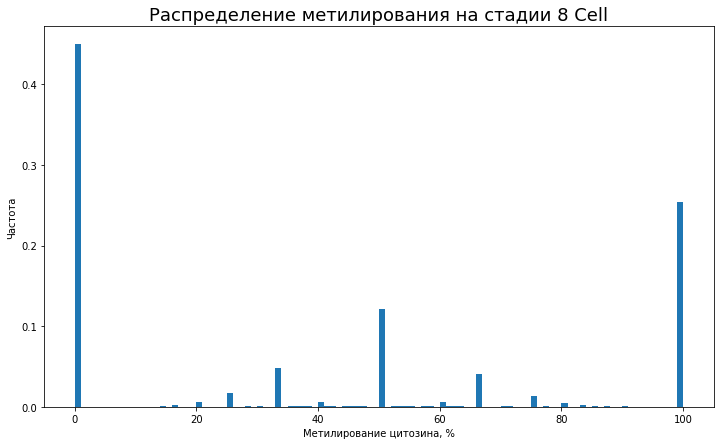

In [ ]:
path = 's_8_cell.deduplicated.bedGraph'
graph = pd.read_csv(path,  delimiter='\t', skiprows=1, header=None)
plt.figure(figsize=(12, 7))
plt.title('Распределение метилирования на стадии 8 Сell', fontsize=18) 
plt.hist(graph[3], bins=100, density=True)
plt.xlabel('Метилирование цитозина, %')
plt.ylabel('Частота')
plt.show()

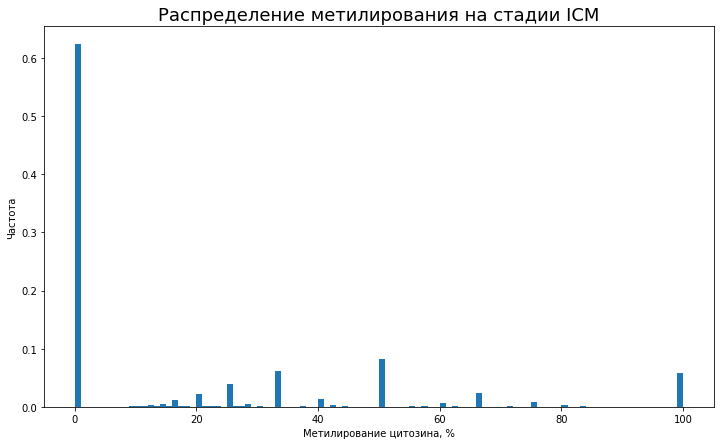

In [ ]:
path = 's_icm.deduplicated.bedGraph'
graph = pd.read_csv(path,  delimiter='\t', skiprows=1, header=None)
plt.figure(figsize=(12, 7))
plt.title('Распределение метилирования на стадии ICM', fontsize=18) 
plt.hist(graph[3], bins=100, density=True)
plt.xlabel('Метилирование цитозина, %')
plt.ylabel('Частота')
plt.show()

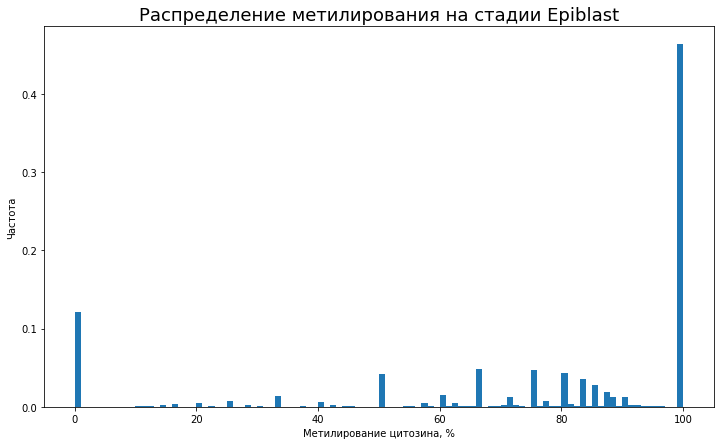

In [ ]:
path = 's_epiblast.deduplicated.bedGraph'
graph = pd.read_csv(path,  delimiter='\t', skiprows=1, header=None)
plt.figure(figsize=(12, 7))
plt.title('Распределение метилирования на стадии Epiblast', fontsize=18) 
plt.hist(graph[3], bins=100, density=True)
plt.xlabel('Метилирование цитозина, %')
plt.ylabel('Частота')
plt.show()

pyGenomeTracks

In [ ]:
! pip install pyGenomeTracks

     |████████████████████████████████| 94 kB 2.1 MB/s 
     |████████████████████████████████| 64 kB 3.0 MB/s 
     |████████████████████████████████| 12.5 MB 48.3 MB/s 
     |████████████████████████████████| 15.7 MB 326 kB/s 
     |████████████████████████████████| 829 kB 43.2 MB/s 
     |████████████████████████████████| 296 kB 72.2 MB/s 
     |████████████████████████████████| 1.5 MB 41.6 MB/s 
     |████████████████████████████████| 11.6 MB 51.6 MB/s 
     |████████████████████████████████| 14.9 MB 33.3 MB/s 
     |████████████████████████████████| 100 kB 8.9 MB/s 
     |████████████████████████████████| 130 kB 57.7 MB/s 
     |████████████████████████████████| 5.9 MB 45.7 MB/s 
     |████████████████████████████████| 11.3 MB 38.9 MB/s 
     |████████████████████████████████| 38.1 MB 1.2 MB/s 
     |████████████████████████████████| 100 kB 8.4 MB/s 
     |████████████████████████████████| 596 kB 63.7 MB/s 
     |████████████████████████████████| 475 kB 58.9 MB/s 
     |██████████

In [ ]:
! pip install -U ipykernel

     |████████████████████████████████| 128 kB 25.4 MB/s 
     |████████████████████████████████| 792 kB 33.1 MB/s 
     |████████████████████████████████| 102 kB 11.2 MB/s 
     |████████████████████████████████| 130 kB 46.3 MB/s 
     |████████████████████████████████| 1.9 MB 51.4 MB/s 
     |████████████████████████████████| 428 kB 37.7 MB/s 
     |████████████████████████████████| 1.6 MB 38.0 MB/s 
     |████████████████████████████████| 59 kB 5.6 MB/s 
     |████████████████████████████████| 380 kB 43.4 MB/s 
     |████████████████████████████████| 1.1 MB 42.0 MB/s 
     |████████████████████████████████| 100 kB 7.9 MB/s 
     |████████████████████████████████| 1.1 MB 40.7 MB/s 
     |████████████████████████████████| 86 kB 4.1 MB/s 


In [ ]:
! conda install -c bioconda ucsc-fetchchromsizes

Solving environment: \ | / - \ | / - \ | / - done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - ucsc-fetchchromsizes


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    libpng-1.6.37              |       h21135ba_2         306 KB  conda-forge
    libuuid-2.32.1             |    h7f98852_1000          28 KB  conda-forge
    mysql-connector-c-6.1.11   |    h6eb9d5d_1007         2.7 MB  conda-forge
    ucsc-fetchchromsizes-377   |       h0b8a92a_2           7 KB  bioconda
    ------------------------------------------------------------
                                           Total:         3.0 MB

The following NEW packages will be INSTALLED:

  libpng             conda-forge/linux-64::libpng-1.6.37-h21135ba_2
  libuuid            conda-forge/linux-64::libuuid-2.32.1-h7f98852_1000
  mysql-connector-c  conda-forge/linux-64::m

In [ ]:
! fetchChromSizes mm10 > m.chrom.sizes

INFO: trying CURL  for database mm10
url: http://hgdownload.soe.ucsc.edu/goldenPath/mm10/bigZips/mm10.chrom.sizes


In [ ]:
! conda install -c bioconda ucsc-bedgraphtobigwig

Solving environment: \ | / - \ | / - \ | / - \ done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - ucsc-bedgraphtobigwig


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ucsc-bedgraphtobigwig-377  |       h446ed27_1         321 KB  bioconda
    ------------------------------------------------------------
                                           Total:         321 KB

The following NEW packages will be INSTALLED:

  ucsc-bedgraphtobi~ bioconda/linux-64::ucsc-bedgraphtobigwig-377-h446ed27_1



ucsc-bedgraphtobigwi | 321 KB    | : 100% 1.0/1 [00:00<00:00,  7.76it/s]
Preparing transaction: / done
Verifying transaction: \ done
Executing transaction: / done


In [ ]:
!gzip -d s_8_cell.deduplicated.bismark.cov.gz
!gzip -d s_epiblast.deduplicated.bismark.cov.gz
!gzip -d s_icm.deduplicated.bismark.cov.gz

In [ ]:
! head s_8_cell.deduplicated.bismark.cov

chr11	3100031	3100031	50	1	1
chr11	3100048	3100048	66.6666666666667	2	1
chr11	3100049	3100049	50	1	1
chr11	3100224	3100224	87.5	7	1
chr11	3100225	3100225	53.3333333333333	8	7
chr11	3100286	3100286	66.6666666666667	6	3
chr11	3100287	3100287	33.3333333333333	5	10
chr11	3100310	3100310	62.5	5	3
chr11	3100311	3100311	50	7	7
chr11	3100349	3100349	55.5555555555556	5	4


In [ ]:
! head s_epiblast.deduplicated.bismark.cov

chr11	3100031	3100031	75	3	1
chr11	3100032	3100032	100	3	0
chr11	3100048	3100048	100	5	0
chr11	3100049	3100049	100	8	0
chr11	3100224	3100224	96.875	31	1
chr11	3100225	3100225	93.75	30	2
chr11	3100286	3100286	93.3333333333333	28	2
chr11	3100287	3100287	92.3076923076923	36	3
chr11	3100310	3100310	96.7741935483871	30	1
chr11	3100311	3100311	97.5	39	1


In [ ]:
! head s_icm.deduplicated.bismark.cov

chr11	3100031	3100031	33.3333333333333	1	2
chr11	3100032	3100032	50	3	3
chr11	3100048	3100048	50	2	2
chr11	3100049	3100049	57.1428571428571	4	3
chr11	3100224	3100224	36.3636363636364	4	7
chr11	3100225	3100225	22.7272727272727	5	17
chr11	3100286	3100286	25	2	6
chr11	3100287	3100287	28.5714285714286	6	15
chr11	3100310	3100310	22.2222222222222	2	7
chr11	3100311	3100311	41.1764705882353	7	10


In [ ]:
! bedGraphToBigWig  s_8_cell.deduplicated.bedGraph m.chrom.sizes cell8_methylation.bigWig.bw
! bedGraphToBigWig  s_epiblast.deduplicated.bedGraph m.chrom.sizes epiblast_methylation.bigWig.bw
! bedGraphToBigWig  s_icm.deduplicated.bedGraph m.chrom.sizes icm_methylation.bigWig.bw

In [ ]:
! head s_8_cell.deduplicated.bedGraph
! head s_epiblast.deduplicated.bedGraph
! head s_icm.deduplicated.bedGraph

track type=bedGraph
chr11	3100030	3100031	50
chr11	3100047	3100048	66.6666666666667
chr11	3100048	3100049	50
chr11	3100223	3100224	87.5
chr11	3100224	3100225	53.3333333333333
chr11	3100285	3100286	66.6666666666667
chr11	3100286	3100287	33.3333333333333
chr11	3100309	3100310	62.5
chr11	3100310	3100311	50
track type=bedGraph
chr11	3100030	3100031	75
chr11	3100031	3100032	100
chr11	3100047	3100048	100
chr11	3100048	3100049	100
chr11	3100223	3100224	96.875
chr11	3100224	3100225	93.75
chr11	3100285	3100286	93.3333333333333
chr11	3100286	3100287	92.3076923076923
chr11	3100309	3100310	96.7741935483871
track type=bedGraph
chr11	3100030	3100031	33.3333333333333
chr11	3100031	3100032	50
chr11	3100047	3100048	50
chr11	3100048	3100049	57.1428571428571
chr11	3100223	3100224	36.3636363636364
chr11	3100224	3100225	22.7272727272727
chr11	3100285	3100286	25
chr11	3100286	3100287	28.5714285714286
chr11	3100309	3100310	22.2222222222222


In [ ]:
! make_tracks_file --trackFiles cell8_methylation.bigWig.bw epiblast_methylation.bigWig.bw icm_methylation.bigWig.bw -o tracks.ini

Adding bigwig file: cell8_methylation.bigWig.bw
Adding bigwig file: epiblast_methylation.bigWig.bw
Adding bigwig file: icm_methylation.bigWig.bw


In [ ]:
! pyGenomeTracks --tracks tracks.ini --region chr11:3100030-3500030 -o image_meth.png

INFO:pygenometracks.tracksClass:initialize 1. [x-axis]
INFO:pygenometracks.tracksClass:initialize 2. [spacer]
INFO:pygenometracks.tracksClass:initialize 3. [cell8_methylation.bigWig]
INFO:pygenometracks.tracksClass:initialize 4. [epiblast_methylation.bigWig]
INFO:pygenometracks.tracksClass:initialize 5. [icm_methylation.bigWig]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.002796649932861328
DEBUG:pygenometracks.tracksClass:Figure size in cm is 40 x 8.909574468085108. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [x-axis]
INFO:pygenometracks.tracksClass:plotting 2. [spacer]
INFO:pygenometracks.tracksClass:plotting 3. [cell8_methylation.bigWig]
INFO:pygenometracks.tracksClass:plotting 4. [epiblast_methylation.bigWig]
INFO:pygenometracks.tracksClass:plotting 5. [icm_methylation.bigWig]


In [ ]:
! apt-get install bedtools

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following packages were automatically installed and are no longer required:
  cuda-command-line-tools-10-0 cuda-command-line-tools-10-1
  cuda-command-line-tools-11-0 cuda-compiler-10-0 cuda-compiler-10-1
  cuda-compiler-11-0 cuda-cuobjdump-10-0 cuda-cuobjdump-10-1
  cuda-cuobjdump-11-0 cuda-cupti-10-0 cuda-cupti-10-1 cuda-cupti-11-0
  cuda-cupti-dev-11-0 cuda-documentation-10-0 cuda-documentation-10-1
  cuda-documentation-11-0 cuda-documentation-11-1 cuda-gdb-10-0 cuda-gdb-10-1
  cuda-gdb-11-0 cuda-gpu-library-advisor-10-0 cuda-gpu-library-advisor-10-1
  cuda-libraries-10-0 cuda-libraries-10-1 cuda-libraries-11-0
  cuda-memcheck-10-0 cuda-memcheck-10-1 cuda-memcheck-11-0 cuda-nsight-10-0
  cuda-nsight-10-1 cuda-nsight-11-0 cuda-nsight-11-1 cuda-nsight-compute-10-0
  cuda-nsight-compute-10-1 cuda-nsight-compute-11-0 cuda-nsight-compute-11-1
  cuda-nsight-systems-10-1 cuda-nsight-systems-

In [ ]:
! bedtools genomecov -bg -ibam s_8_cell.deduplicated.bam -g m.chromSizes  >  s_8_cell.cover.bedGraph
! bedtools genomecov -bg -ibam s_icm.deduplicated.bam -g m.chromSizes  >  s_icm.cover.bedGraph
! bedtools genomecov -bg -ibam s_epiblast.deduplicated.bam -g m.chromSizes  >  s_epiblast.cover.bedGraph

In [ ]:
! bedGraphToBigWig   s_8_cell.cover.bedGraph m.chrom.sizes cell8_coverage.bigWig.bw
! bedGraphToBigWig   s_icm.cover.bedGraph m.chrom.sizes icm_coverage.bigWig.bw
! bedGraphToBigWig   s_epiblast.cover.bedGraph m.chrom.sizes epiblast_coverage.bigWig.bw

In [ ]:
! make_tracks_file --trackFiles cell8_coverage.bigWig.bw epiblast_coverage.bigWig.bw icm_coverage.bigWig.bw -o tracks.ini.txt

Adding bigwig file: cell8_coverage.bigWig.bw
Adding bigwig file: epiblast_coverage.bigWig.bw
Adding bigwig file: icm_coverage.bigWig.bw


In [ ]:
! pyGenomeTracks --tracks tracks.ini.txt --region chr11:3100030-3500030 -o image_cov.png

INFO:pygenometracks.tracksClass:initialize 1. [x-axis]
INFO:pygenometracks.tracksClass:initialize 2. [spacer]
INFO:pygenometracks.tracksClass:initialize 3. [cell8_coverage.bigWig]
INFO:pygenometracks.tracksClass:initialize 4. [epiblast_coverage.bigWig]
INFO:pygenometracks.tracksClass:initialize 5. [icm_coverage.bigWig]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.0025360584259033203
DEBUG:pygenometracks.tracksClass:Figure size in cm is 40 x 8.909574468085108. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [x-axis]
INFO:pygenometracks.tracksClass:plotting 2. [spacer]
INFO:pygenometracks.tracksClass:plotting 3. [cell8_coverage.bigWig]
INFO:pygenometracks.tracksClass:plotting 4. [epiblast_coverage.bigWig]
INFO:pygenometracks.tracksClass:plotting 5. [icm_coverage.bigWig]


Получаем FastQ отчет для SRR5836473_1

In [ ]:
! gzip -d /content/SRR5836473_1_1.fastq.gz

In [ ]:
!chmod a+x FastQC/fastqc
!FastQC/fastqc  /content/SRR5836473_1_1.fastq

Started analysis of SRR5836473_1_1.fastq
Approx 5% complete for SRR5836473_1_1.fastq
Approx 10% complete for SRR5836473_1_1.fastq
Approx 15% complete for SRR5836473_1_1.fastq
Approx 20% complete for SRR5836473_1_1.fastq
Approx 25% complete for SRR5836473_1_1.fastq
Approx 30% complete for SRR5836473_1_1.fastq
Approx 35% complete for SRR5836473_1_1.fastq
Approx 40% complete for SRR5836473_1_1.fastq
Approx 45% complete for SRR5836473_1_1.fastq
Approx 50% complete for SRR5836473_1_1.fastq
Approx 55% complete for SRR5836473_1_1.fastq
Approx 60% complete for SRR5836473_1_1.fastq
Approx 65% complete for SRR5836473_1_1.fastq
Approx 70% complete for SRR5836473_1_1.fastq
Approx 75% complete for SRR5836473_1_1.fastq
Approx 80% complete for SRR5836473_1_1.fastq
Approx 85% complete for SRR5836473_1_1.fastq
Approx 90% complete for SRR5836473_1_1.fastq
Approx 95% complete for SRR5836473_1_1.fastq
Analysis complete for SRR5836473_1_1.fastq
